# Importação de bibliotecas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### Importação dos dados



In [2]:
url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja1 = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

# Identificando a loja

In [3]:
loja1["Loja"] = "Loja 1"
loja2["Loja"] = "Loja 2"
loja3["Loja"] = "Loja 3"
loja4["Loja"] = "Loja 4"

# Unindo os dados

In [7]:
dados = pd.concat([loja1, loja2, loja3, loja4])

# Criando coluna de faturamento

In [8]:
dados['Faturamento'] = dados['Preço'] * dados['Quantidade de parcelas']

#1. Análise do faturamento


In [9]:
faturamento = dados.groupby("Loja")["Faturamento"].sum().sort_values(ascending=False)
print("Faturamento por Loja:")
print(faturamento)

Faturamento por Loja:
Loja
Loja 1    4563636.11
Loja 2    4449584.18
Loja 3    4325091.42
Loja 4    4131753.14
Name: Faturamento, dtype: float64


# 2. Vendas por Categoria


In [11]:
vendas_categoria = dados.groupby("Categoria do Produto")["Quantidade de parcelas"].sum().sort_values(ascending=False)
print("\nVendas por Categoria:")
print(vendas_categoria)


Vendas por Categoria:
Categoria do Produto
moveis                   5511
eletronicos              5229
brinquedos               3606
eletrodomesticos         3434
esporte e lazer          3175
instrumentos musicais    2312
livros                   2239
utilidades domesticas    2114
Name: Quantidade de parcelas, dtype: int64


# 3. Média de Avaliação das Lojas

In [12]:
avaliacao_media = dados.groupby("Loja")["Avaliação da compra"].mean().sort_values(ascending=False)
print("\nAvaliação média por Loja:")
print(avaliacao_media)


Avaliação média por Loja:
Loja
Loja 3    4.048326
Loja 2    4.037304
Loja 4    3.995759
Loja 1    3.976685
Name: Avaliação da compra, dtype: float64


# 4. Produtos Mais e Menos Vendidos

In [13]:
vendas_produto = dados.groupby("Produto")["Quantidade de parcelas"].sum()
mais_vendidos = vendas_produto.sort_values(ascending=False).head(5)
menos_vendidos = vendas_produto.sort_values().head(5)

print("\nTop 5 produtos mais vendidos:")
print(mais_vendidos)
print("\nTop 5 produtos menos vendidos:")
print(menos_vendidos)



Top 5 produtos mais vendidos:
Produto
Secadora de roupas    649
Cômoda                627
Pandeiro              625
Bicicleta             614
Celular Plus X42      611
Name: Quantidade de parcelas, dtype: int64

Top 5 produtos menos vendidos:
Produto
Smartwatch        432
Jogo de copos     435
Celular ABXY      447
Dinossauro Rex    458
Mesa de centro    469
Name: Quantidade de parcelas, dtype: int64


# 5. Frete Médio por Loja


In [14]:
frete_medio = dados.groupby("Loja")["Frete"].mean().sort_values()
print("\nFrete médio por loja:")
print(frete_medio)


Frete médio por loja:
Loja
Loja 4    31.278997
Loja 3    33.074464
Loja 2    33.621941
Loja 1    34.691805
Name: Frete, dtype: float64


# Gráfico 1: Faturamento por loja (barras verticais)

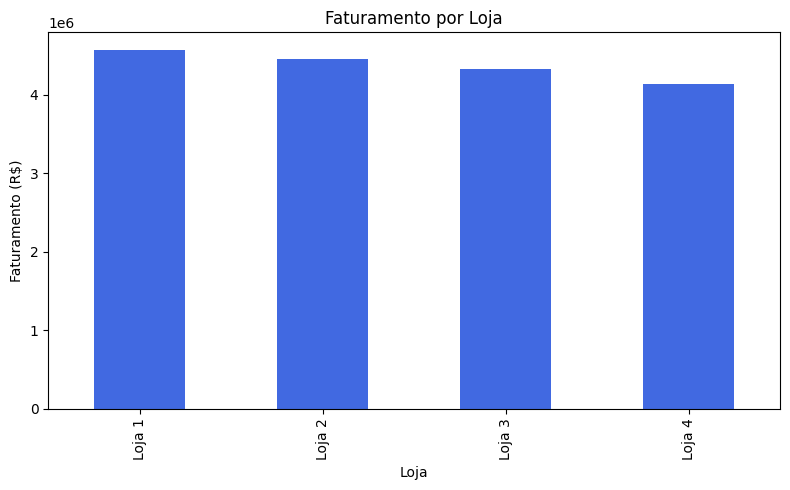

In [15]:
plt.figure(figsize=(8,5))
faturamento.plot(kind="bar", color="royalblue")
plt.title("Faturamento por Loja")
plt.ylabel("Faturamento (R$)")
plt.xlabel("Loja")
plt.tight_layout()
plt.show()

# Gráfico 2: Vendas por Categoria (pizza)

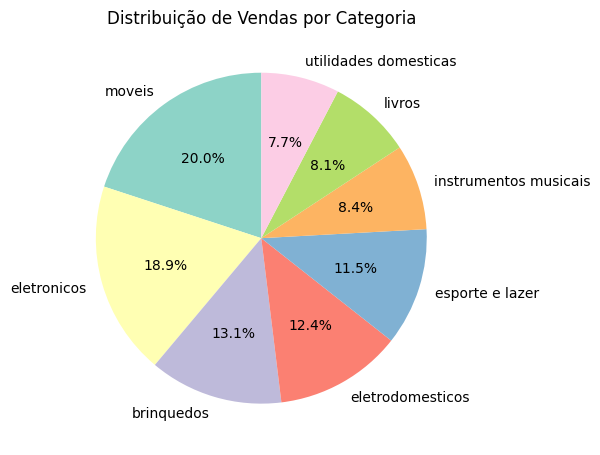

In [16]:
plt.figure(figsize=(6,6))
vendas_categoria.plot(kind="pie", autopct='%1.1f%%', startangle=90, colors=plt.cm.Set3.colors)
plt.title("Distribuição de Vendas por Categoria")
plt.ylabel("")
plt.tight_layout()
plt.show()

# Gráfico 3: Avaliação média por loja (barras horizontais)

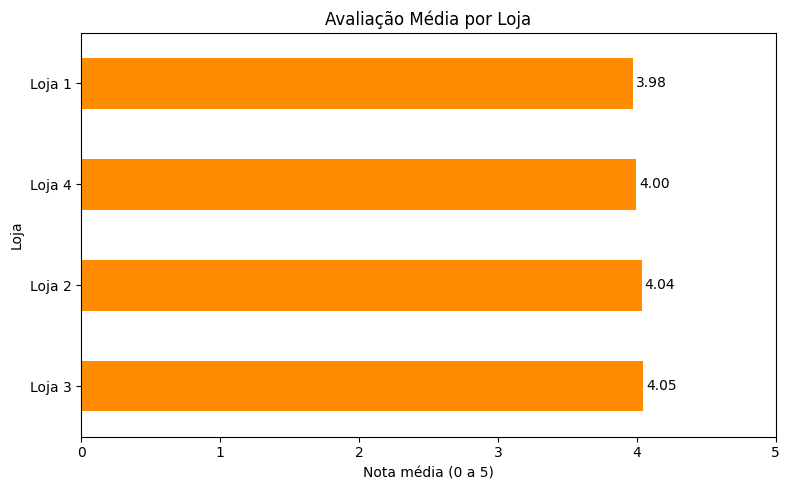

In [19]:
plt.figure(figsize=(8,5))
avaliacao_media.plot(kind="barh", color="darkorange")
plt.title("Avaliação Média por Loja")
plt.xlabel("Nota média (0 a 5)")
plt.ylabel("Loja")
plt.xlim(0, 5)

# Adicionar valores nas barras
for index, value in enumerate(avaliacao_media):
    plt.text(value + 0.02, index, f"{value:.2f}", va='center')

plt.tight_layout()
plt.show()

# Recomendação Final

In [18]:
print("\n===== RECOMENDAÇÃO FINAL =====")
pior_loja_faturamento = faturamento.idxmin()
pior_loja_avaliacao = avaliacao_media.idxmin()

print(f"A loja com o menor faturamento é: {pior_loja_faturamento}")
print(f"A loja com a pior avaliação é: {pior_loja_avaliacao}")

if pior_loja_faturamento == pior_loja_avaliacao:
    print(f"🔴 Recomenda-se vender a {pior_loja_faturamento}, pois ela tem baixo faturamento e avaliações ruins.")
else:
    print(f"🔶 Embora a {pior_loja_faturamento} tenha o menor faturamento, a {pior_loja_avaliacao} tem as piores avaliações.\n")
    print("📌 A decisão deve considerar também fatores como reputação e custo de operação.")


===== RECOMENDAÇÃO FINAL =====
A loja com o menor faturamento é: Loja 4
A loja com a pior avaliação é: Loja 1
🔶 Embora a Loja 4 tenha o menor faturamento, a Loja 1 tem as piores avaliações.

📌 A decisão deve considerar também fatores como reputação e custo de operação.


# Relatório Final de Análise das Lojas

## **Introdução**

O objetivo desta análise foi avaliar o desempenho das quatro lojas gerenciadas pelo Senhor João, utilizando diferentes métricas como faturamento total, categorias de produtos mais e menos vendidas, avaliações médias dos clientes, produtos mais e menos vendidos e o frete médio praticado por cada loja. A partir dessas informações, elaboramos uma recomendação estratégica sobre qual loja o Senhor João deve vender, considerando os pontos fortes e fracos de cada uma.

---

## **Desenvolvimento**

### **1. Faturamento Total das Lojas**

| Loja   | Faturamento (R$) |
|--------|------------------|
| Loja 1 | 4.563.636,11     |
| Loja 2 | 4.449.584,18     |
| Loja 3 | 4.325.091,42     |
| Loja 4 | 4.131.753,14     |

**Análise:**  
A Loja 1 é a que possui o maior faturamento, seguida pela Loja 2 e Loja 3, com diferenças relativamente pequenas entre elas. A Loja 4 é a que apresenta o menor faturamento, cerca de 431 mil reais a menos que a Loja 1.

---

### **2. Distribuição das Vendas por Categoria**

| Categoria               | Quantidade Vendida |
|------------------------|--------------------|
| Móveis                 | 5.511              |
| Eletrônicos            | 5.229              |
| Brinquedos             | 3.606              |
| Eletrodomésticos       | 3.434              |
| Esporte e Lazer        | 3.175              |
| Instrumentos Musicais  | 2.312              |
| Livros                 | 2.239              |
| Utilidades Domésticas  | 2.114              |

**Análise:**  
As categorias mais vendidas são **Móveis** e **Eletrônicos**, representando cerca de 40% do total das vendas. Já as categorias **Livros** e **Utilidades Domésticas** são as menos vendidas.

---

### **3. Avaliação Média das Lojas**

| Loja   | Avaliação Média |
|--------|-----------------|
| Loja 3 | 4,05            |
| Loja 2 | 4,04            |
| Loja 4 | 4,00            |
| Loja 1 | 3,98            |

**Análise:**  
Embora todas as lojas tenham avaliações relativamente próximas, a **Loja 3** possui a melhor reputação entre os clientes, seguida de perto pela **Loja 2**. A **Loja 1**, apesar de ser a que mais fatura, apresenta a **pior avaliação média**.

---

### **4. Produtos Mais e Menos Vendidos**

**Top 5 Mais Vendidos:**
1. Secadora de roupas — 649 unidades
2. Cômoda — 627 unidades
3. Pandeiro — 625 unidades
4. Bicicleta — 614 unidades
5. Celular Plus X42 — 611 unidades

**Top 5 Menos Vendidos:**
1. Smartwatch — 432 unidades
2. Jogo de copos — 435 unidades
3. Celular ABXY — 447 unidades
4. Dinossauro Rex — 458 unidades
5. Mesa de centro — 469 unidades

**Análise:**  
Os produtos de maior saída estão relacionados à **linha branca**, **móveis** e **esportes**. Por outro lado, itens de menor giro incluem **acessórios**, **artigos de decoração** e produtos mais específicos como o **Smartwatch**.

---

### **5. Frete Médio por Loja**

| Loja   | Frete Médio (R$) |
|--------|------------------|
| Loja 4 | 31,28            |
| Loja 3 | 33,07            |
| Loja 2 | 33,62            |
| Loja 1 | 34,69            |

**Análise:**  
A **Loja 4** apresenta o **menor custo médio de frete**, o que pode representar uma vantagem competitiva, especialmente em estratégias de frete grátis ou descontos logísticos. Por outro lado, a **Loja 1** possui o frete médio mais elevado.

---

## **Conclusão e Recomendação**

Com base nas análises, chegamos às seguintes conclusões:

✅ **Pontos fortes da Loja 1**: maior faturamento entre as lojas.  
❌ **Pontos fracos da Loja 1**: pior avaliação média pelos clientes e maior custo de frete.

✅ **Pontos fortes da Loja 3**: melhor avaliação média, com reputação positiva e frete relativamente baixo.  
❌ **Pontos fracos da Loja 3**: faturamento inferior à Loja 1 e Loja 2.

✅ **Pontos fortes da Loja 4**: menor custo de frete e avaliação próxima das demais.  
❌ **Pontos fracos da Loja 4**: **menor faturamento** entre as lojas.

✅ **Pontos fortes da Loja 2**: faturamento elevado e boa avaliação.

---

### **Recomendação Final**

📌 **A recomendação é que o Senhor João venda a Loja 1.**

**Justificativa:**
- Apesar de ser a loja com maior faturamento, a Loja 1 apresenta **a pior avaliação média** e **o maior custo de frete**, o que pode afetar a **satisfação e fidelização de clientes** a médio e longo prazo.
- Além disso, o desempenho das demais lojas é suficientemente bom para manter a saúde financeira do negócio, com avaliações melhores e custos logísticos menores.
- Vender a Loja 1 permitirá ao Senhor João **capitalizar o valor de mercado** dessa loja, devido ao seu alto faturamento, e ainda **manter lojas com melhor reputação e potencial de crescimento**.

Essa decisão considera não apenas os indicadores financeiros, mas também aspectos estratégicos como reputação, eficiência logística e potencial de melhoria.
# Nova seção